Importing Neccessary Libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

Importing the Dataset

In [292]:
dataset = pd.read_csv('1.CAR DETAILS FROM CAR DEKHO.csv')

In [293]:
# To print the shape of the dataframe
dataset.shape

(4340, 8)

In [294]:
# To get the first 3 rows
dataset.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [295]:
# To get the last 3 rows
dataset.tail(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [296]:
# To print the concise summary of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Data Cleaning and Manipulation

In [297]:
#Checking for the null values in the dataset
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [298]:
# To generate the descriptive statistics of the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [299]:
#To find whether there is any duplicates values in the dataset
dataset.duplicated().sum()

763

In [300]:
# To drop duplicate values
dataset.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


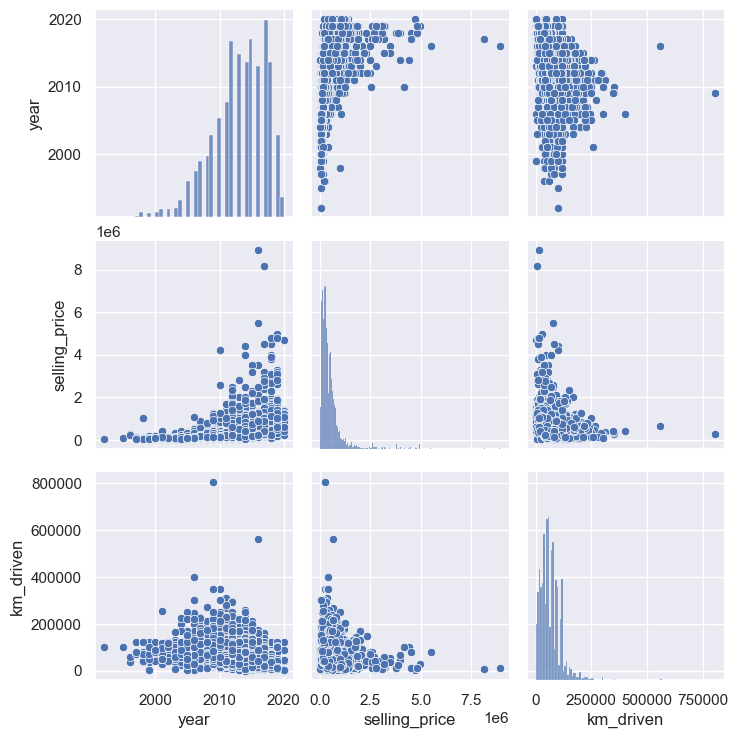

In [301]:
# To visualize the pairplot of the df
sns.pairplot(dataset)

In [302]:
# To get the info about the columns
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [303]:
#Split name into two parts company_name and model
x = dataset["name"][0]
x.index(" ")

6

In [304]:
#Removing company name from name using customized funtion
def company_name(x):
    return x[:x.index(" ")]
dataset["name"].apply(company_name)

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name, Length: 4340, dtype: object

In [305]:
dataset["company_name"] = dataset["name"].apply(company_name)

In [306]:
#name column
def name(x):
    return x[x.index(" ")+1:]
dataset["company_name"] = dataset["name"].apply(company_name)

In [307]:
dataset["name"] = dataset["name"].apply(name)

In [308]:
dataset.rename(columns={'name':'Model'})
dataset = dataset.rename(columns={'name':'Model'})

Data Visualization

Top 10 Selling car company

In [309]:
car_counts = dataset["company_name"].value_counts()

In [310]:
top_10_cars = car_counts.head(10)

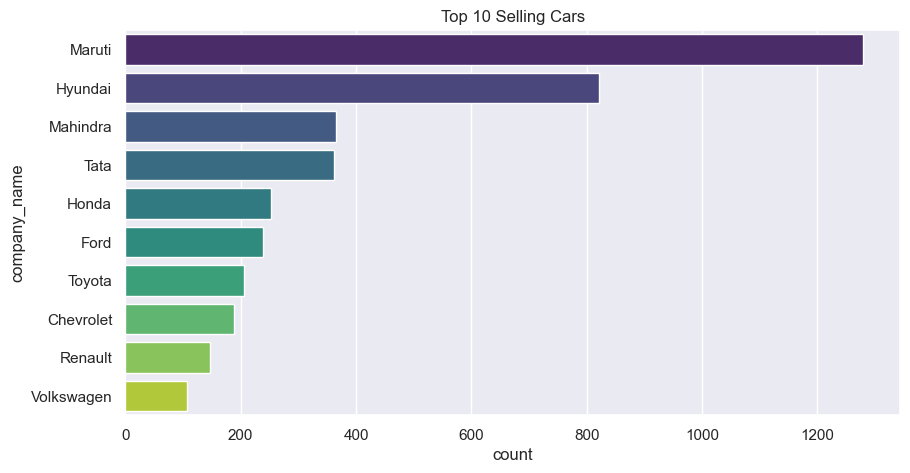

In [311]:
# convert the top 10 car series to dataframe for easier plotting
top_10_cars_dataset = top_10_cars.reset_index()
top_10_cars_dataset.columns = ['company_name','count']
sns.barplot(x = 'count', y = 'company_name', data = top_10_cars_dataset, palette = 'viridis')
plt.title("Top 10 Selling Cars")
plt.show()

Highest car Sell according to year 

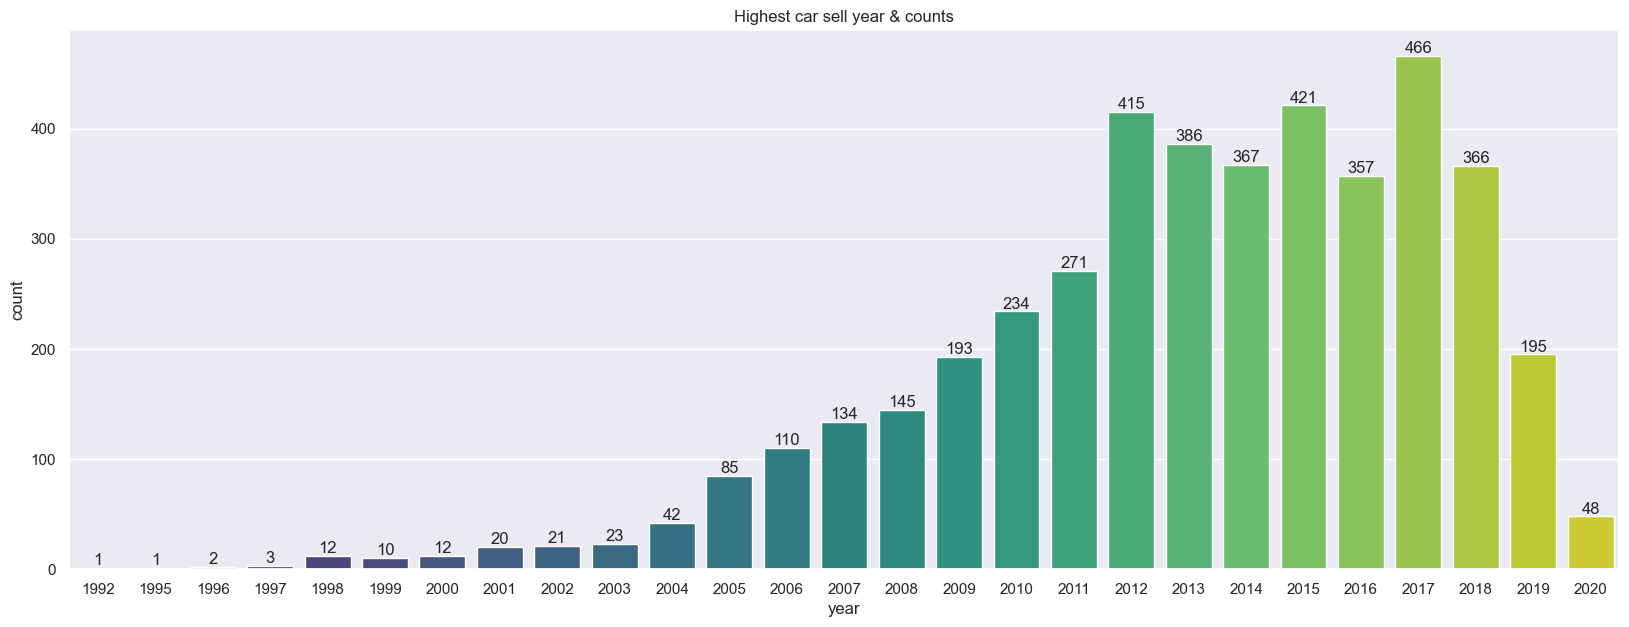

In [312]:
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.countplot(x = "year", data = dataset, palette = 'viridis')
plt.title("Highest car sell year & counts")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Owner Count

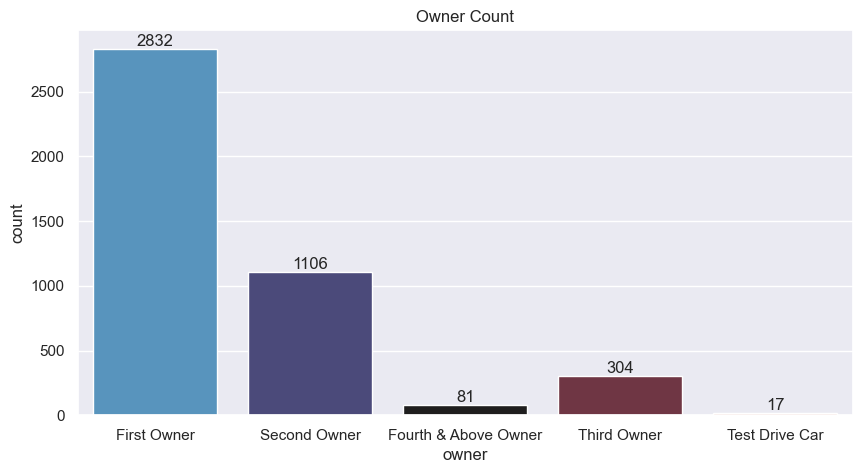

In [338]:
sns.set(rc = {'figure.figsize':(10,5)})
ax = sns.countplot(x = 'owner', data = dataset, palette = 'icefire')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Owner Count")
plt.show()

Fuel Type

In [315]:
dataset['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [316]:
x = dataset['fuel'].value_counts().index
y = dataset['fuel'].value_counts().values

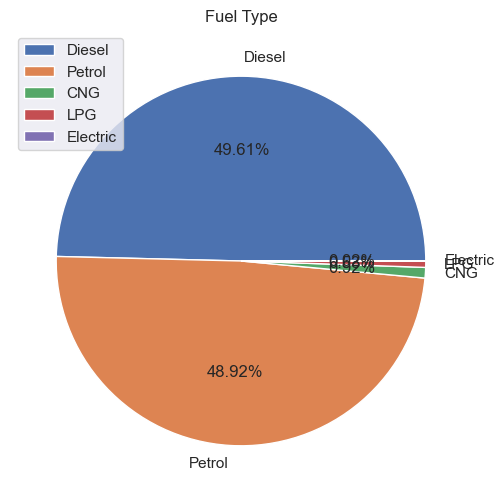

In [337]:
plt.figure(figsize = (7,6))
plt.pie(y, labels = x, autopct = '%0.2f%%')
plt.legend(loc = 2)
plt.title('Fuel Type')
plt.show()
#autopct='%1.1f%%', startangle=140, shadow=True, )

Seller Type

In [322]:
dataset['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

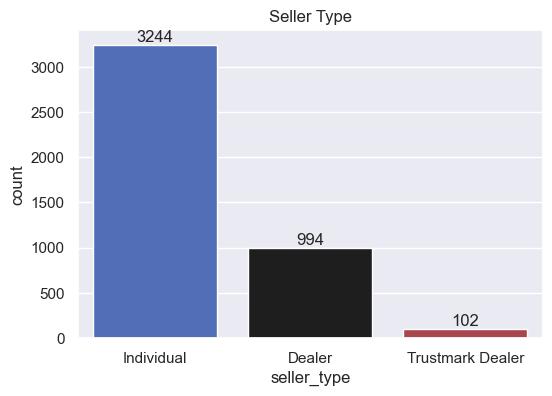

In [336]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'seller_type', data = dataset, palette = 'icefire')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Seller Type')
plt.show()


In [329]:
dataset.columns

Index(['Model', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'company_name'],
      dtype='object')

Transmission Type

In [330]:
dataset['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

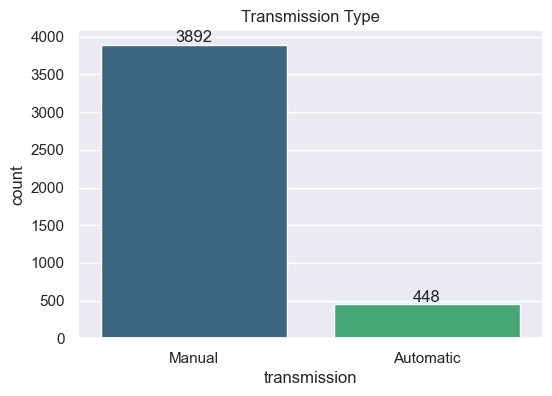

In [335]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'transmission', data = dataset, palette = 'viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Transmission Type')
plt.show()

Data Insights :
1. Maruti, Hyundai and Mahindra/Tata are top 3 selling car Brand.
2. 2017 is the year in which highest cars were sold.
3. 2832 were first owner cars.
4. 1106 were second and 306 were third owner cars.
5. 49.61% were Diesel cars and 48.92% were Petrol cars.
6. 3244 cars were brought Individually.
7. 994 cars were brought through Dealers.
8. 102 were brought from TrustMark Dealers.  
9. 3892 cars was Manual transmission.
10. Whereas 448 cars were Automatic Transmission.

Machine Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

Removing Outlier

In [ ]:
dataset["company_name"]
sns.boxplot(x = 'selling_price', data = dataset)

In [ ]:
q1 = np.quantile(dataset['selling_price'],0.25)
q3 = np.quantile(dataset['selling_price'],0.75)

In [ ]:
iqr = q3 - q1 #Inter quantile range

In [ ]:
min_r = q1-(1.5*iqr)
max_r = q3+(1.5*iqr)

In [ ]:
dataset[dataset['selling_price']<=max_r]
dataset = dataset[dataset['selling_price']<=max_r]